In [1]:
# 安装包
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# 下载数据集，并构建DataLoder
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=1)

# 设计好类别
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


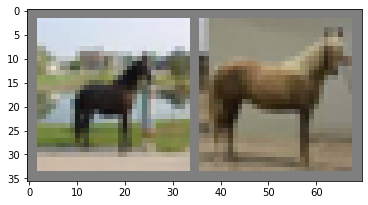

horse horse


In [4]:
# 输出图像的函数
def imshow(img):
    img = img / 2 + 0.5  # 非规范化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机获取训练图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片标签
print(' '.join('%5s' % classes[labels[j]] for j in range(2)))

In [5]:
# 3.定义CNN网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    # 前向传播过程
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
# 4.定义损失函数和优化器
# 交叉熵损失函数
criterion = nn.CrossEntropyLoss()
# 随机梯度下降
# 学习率/步长：0.001
# 矢量momentum：0.9
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):
    running_loss = 0.0
    # enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列
    # 同时列出数据和数据下标，一般用在 for 循环当中。
    for i, data in enumerate(trainloader, 0):
        # 获取输入
        inputs, labels = data
        # 参数梯度置0
        optimizer.zero_grad()

        # 前向传播
        outputs = net(inputs)
        # 计算误差
        loss = criterion(outputs, labels)
        # 反向传播
        loss.backward()
        # 优化器更新
        optimizer.step()

        # 输出统计数据
        running_loss += loss.item()
        # 每2000样本输出一次
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
print('Finished Training!')

[1,  2000] loss: 2.188
[1,  4000] loss: 1.902
[1,  6000] loss: 1.755
[1,  8000] loss: 1.661
[1, 10000] loss: 1.599
[1, 12000] loss: 1.552
[1, 14000] loss: 1.565
[1, 16000] loss: 1.480
[1, 18000] loss: 1.496
[1, 20000] loss: 1.436
[1, 22000] loss: 1.450
[1, 24000] loss: 1.429
[2,  2000] loss: 1.333
[2,  4000] loss: 1.349
[2,  6000] loss: 1.375
[2,  8000] loss: 1.334
[2, 10000] loss: 1.331
[2, 12000] loss: 1.349
[2, 14000] loss: 1.321
[2, 16000] loss: 1.296
[2, 18000] loss: 1.302
[2, 20000] loss: 1.324
[2, 22000] loss: 1.314
[2, 24000] loss: 1.310
Finished Training!


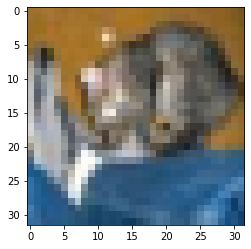

GroundTruth:    cat
Accuracy of the network on the 10000 test images: 54 %
Accuracy of plane : 52 %
Accuracy of   car : 60 %
Accuracy of  bird : 52 %
Accuracy of   cat : 35 %
Accuracy of  deer : 48 %
Accuracy of   dog : 45 %
Accuracy of  frog : 70 %
Accuracy of horse : 48 %
Accuracy of  ship : 73 %
Accuracy of truck : 56 %


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 输出图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

# 加载保存模型
PATH = './cifar_net.pth'
net.load_state_dict(torch.load(PATH))
outputs = net(images)

# 对数据集进行正确率判断
correct = 0
total = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        # 预测结果
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()

        # 总共正确率
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 分类别正确率
        for i in range(1):
            label = labels[i]
            class_correct[label]+= c.item()
            class_total[label] += 1

# 输出结果
print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))